# Programmatic Data Wrangling, an exploration of TMDB_movies.csv
<hr/>

## Prerequisites

<ol>
    <li>Before running the code please ensure that "TMDB_movies.csv" is saved in the same folder as this notebook.</li>
    <li>Please run the following code in order to import the necessary libraries for the rest to run.</li>
</ol>

In [2]:
import numpy as np  # For maths
import seaborn as sns # For visualisations
import matplotlib.pyplot as plt # More for visualisation
import pandas as pd # For data analysis

## Creation of data frame and brief look at what is going on

In [4]:
df = pd.read_csv("TMDB_movies.csv") # Assigning the data frame to name 'df'

In [5]:
df.shape # Number of (rows, columns)

(4803, 20)

In [6]:
df.head(5) # Display first 5 rows of the dataframe to see what is in each of the columns

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Data cleaning

### Null values

#### Finding null values 

In [9]:
df.isnull().sum() # Displays total number of null values for each movie

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Homepage
Due to the fact that 64% of the data in this column are null values and the column as a whole provides little insight into the movies, I have decided to drop the column in order to avoid interference when further exploring the data. The code for this can be seen below:

In [11]:
df.drop(columns = "homepage", inplace = True) # Dropping the homepage column from df

#### Release date
There is only one null value in release_date. Upon checking with the line of code below, most values in this row are empty lists or just 0, providing no insight so I have decided to drop this row.

In [13]:
df[df['release_date'].isnull()] # Returns rows where "release_date" is null

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [15]:
df.dropna(subset = ['release_date']).shape # First testing to ensure only that single row will be dropped

(4802, 19)

In [21]:
df.dropna(subset = ['release_date'], inplace = True) # Dropping the row

#### Overview and Runtime
After looking at the 3 rows with null values in overview, it appears that the 2 null values we can find in the runtime column also appear here. Due to the size of the DataFrame being over 4800 rows I decided to remove the rows where overview was null because the impact of losing 3 rows out of 4802 is less than the impact of having null values when analysing the data further. The code for finding the null rows and dropping them can be seen below.

In [26]:
df[df['overview'].isnull()] # Looking at the rows where overview is null

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


In [27]:
df.dropna(subset = ['runtime', 'overview'], how = 'any').shape # Initial check to ensure the 3 rows are being dropped

(4799, 19)

In [30]:
df.dropna(subset = ['runtime', 'overview'], how = 'any', inplace = True) # Dropping the rows

In [32]:
df.shape

(4799, 19)

#### Tagline
Due to the unimportance of a tagline in my analysis and there being over 800 null values, instead of losing all of those rows I will be dropping the "tagline" column. This data is missing completely at random and the null values don't give any insight into the dataset.

In [35]:
df[df['tagline'].isnull()] # Seeing where the nulls appear. No pattern.

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Up,7.7,6870
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",278927,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Jungle Book,6.7,2892
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",13448,"[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Angels & Demons,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Angels & Demons,6.5,2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6


In [37]:
df.drop(columns = "tagline").shape # Check that the number of columns drops from 19 to 18

(4799, 18)

In [39]:
df.drop(columns = "tagline", inplace = True) # Dropping the column

<b>Final check to count how many null values remain</b>

In [42]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Duplicates

#### Ensuring formatting is the same
Duplicate titles exist in both the original_title and title columns. In order to ensure that no duplicates are hidden due to formatting of the title, I will ensure that all titles follow the same format with single spaces between each word, title casing and no whitespaces on each end.

In [45]:
# Removing whitespaces on each end for both columns
df['title'] = df['title'].str.strip()
df['original_title'] = df['original_title'].str.strip()

# Applying title casing to each column
df['title'] = df['title'].str.title()
df['original_title'] = df['original_title'].str.title()

# Replacing any double or more spaces with a single space
df['title'] = df['title'].str.replace(r'\s{2,}', ' ')
df['original_title'] = df['original_title'].str.replace(r'\s{2,}', ' ')

#### Checking for duplicate values

In [48]:
df[df.duplicated(subset=['title'], keep=False)] # keep=False shows me all the rows where duplicates occur

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Host,6.0,1817
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Batman,7.0,2096
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,The Host,6.7,537
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out Of The Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Out Of The Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out Of The Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Out Of The Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman,6.1,203


In [50]:
df[df.duplicated(subset=['original_title'], keep=False)] # keep=False shows me all the rows where duplicates occur

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Batman,7.0,2096
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out Of The Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Out Of The Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out Of The Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Out Of The Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman,6.1,203


#### Dealing with duplicates

Due to the fact that the repeated names are are still different movies I will use the "id" column instead of either of the title columns when analysing the dataset.

### Confusing entries

When looking at the DataFrame with `df.head(5)` we can see that many columns are entered as string lists. In order to extract the relevant information from these columns we can see that we need the values under the key "name" for most and "iso_639_1" for the "spoken_languages" column due to the encoding of symbols used in the native language of some countries such as Korea. 

#### Dealing with the string lists

In [54]:
import ast ## Library used to deal with the string lists

To deal with the string lists we will use a function convert each string list to a list and loop through it adding the value under the 'name' to a new list that will be returned. An example is `[{"id": 18, "name": "Drama"}]` will be converted to `["Drama"]`. In the case of the second function, it works just like the first but stores the value under 'iso_639_1'.

In [57]:
def extract_value(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    return Genres # returns new list that only contains the values we are after

In [59]:
def extract_value2(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['iso_639_1']) ## Grab the 'iso_639_1' key for each dictionary
        
    return Genres # returns new list that only contains the values we are after

#### Applying the function to all the columns where necessary

In [62]:
df['extracted_genres'] = df['genres'].apply(extract_value) # Extracting the "name" values from "genres"

In [63]:
df['extracted_keywords'] = df['keywords'].apply(extract_value) # Extracting the "name" values from "keywords"

In [65]:
df['extracted_production_companies'] = df['production_companies'].apply(extract_value) # Extracting the "name" values from "production_companies"

In [66]:
df['extracted_production_countries'] = df['production_countries'].apply(extract_value) # Extracting the "name" values from "production_countries"

In [68]:
df['extracted_spoken_languages'] = df['spoken_languages'].apply(extract_value2) # Extracting the "iso_639_1" values from "spoken_languages"

#### Removing the old columns

Now that we have extracted the key information we can drop the columns containing the string lists.

In [72]:
df.drop(columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'], inplace = True) # Dropping the columns

In [73]:
df.head() # Check to see that the correct columns we dropped

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[en, es]"
1,300000000,285,en,Pirates Of The Caribbean: At World'S End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates Of The Caribbean: At World'S End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[en]
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[fr, en, es, it, de]"
3,250000000,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[en]
4,260000000,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[en]


## Analysis

In this section I will consider the relationships between 'vote_average', 'revenue' and 'budget' to investigate which factors are most valuable in making a high grossing and/or profitable movie.

### Exploring effects of vote_average on the average film revenue

In [79]:
## Creating a DataFrame with each of the vote averages (0.1, 0.2, ... 9.9, 10.0) and the corresponding average revenue
vote_group = df.groupby(['vote_average'])[['revenue']].mean().copy()

C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


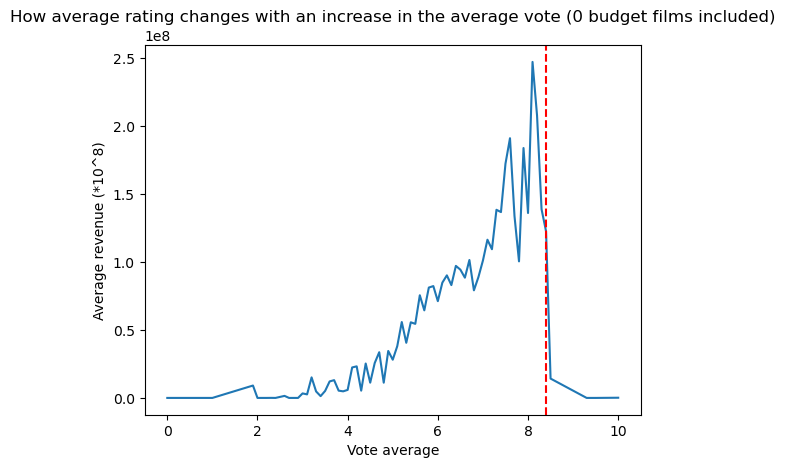

In [145]:
## Create line plot of average vote against average revenue
vote_rev = sns.lineplot(x = 'vote_average',
                        y = 'revenue',
                        data = vote_group)

## Add axes labels and title
plt.title('How average rating changes with an increase in the average vote (0 budget films included)')
plt.ylabel('Average revenue (*10^8)')
plt.xlabel('Vote average')

## Plot a vertical line on vote average = 8.4
plt.axvline(x=8.4, color = 'red', linestyle = '--')

plt.show()

Here we can see the actual values that can be seen on the graph:

In [155]:
vote_group.tail(7) ## The last 7 average ratings

,revenue
vote_average,
8.2,2.077749e+08
8.3,1.388154e+08
8.4,1.225332e+08
8.5,1.423249e+07
9.3,0.000000e+00
9.5,0.000000e+00
10.0,1.413980e+05


#### Why the sudden drop?

When the vote average becomes grater than 8.4 we see a sudden drop off in average revenue. Lets compare what is going on when vote average is greater than 8.4 and less than or equal to 8.4.

In [153]:
len(df[df.vote_average > 8.4]) # How many films have a vote average > 8.4

8

In [87]:
num_rows1 = len(df) ## total number of films
num_rows2 = len(df[df.vote_average > 8.4]) # number of films above 8.4 average vote
percent_films = f'{(num_rows2/num_rows1)*100}% of films have an average vote higher than 8.4.'

percent_films

'0.16670139612419255% of films have an average vote higher than 8.4.'

In [89]:
len(df[(df.vote_average > 8.4) & (df.budget == 0)]) ## No budget films with higher rating than 8.5

5

As seen above just <b>8</b> movies have a rating of 8.5 or higher. This means that the revenue of each movie individually has a large impact on the average revenue, 5 of which have a budget of zero. It is clear to see that the results are heavily affected by niche films that have excelled in ratings from a concentrated audience but not been as successful commercially.

#### What is the takeaway?

It is clear to see that with the exception of movies rated 8.5 and higher, the higher the average vote a movie receives, the higher the revenue it generates.

<hr/>

### What impact does budget have on the revenue of a movie?

We have seen how the change in budget has affected the findings from above so lets explore the relation between budget and revenue.

In [93]:
## Creating the budget bins for a bar plot
df['budget_bins'] = pd.cut(df['budget'], bins=20)

C:\Users\taich\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


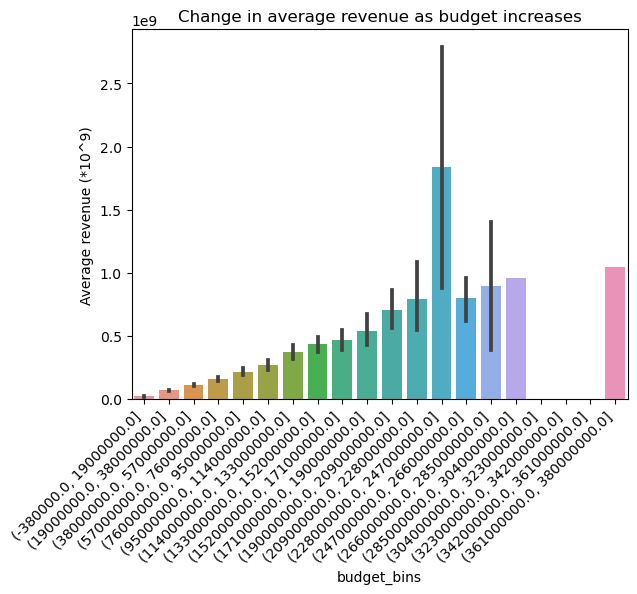

In [95]:
## Making the bar plot of average revenue against 
budget_plot = sns.barplot(x = 'budget_bins',
            y = 'revenue',
            data = df)

## Setting the title, ticks on the x axis and labelling the y axis
plt.title('Change in average revenue as budget increases')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Average revenue (*10^9)')

plt.show()

By looking at the plot the we can see there is a pattern that when the budget of a film increases, on average, the revenue generated by those films increases also.

#### We have an outlier

But what causes the outlier in the bin (228000000.0, 247000000.0]?

Lets see what movies are inside this interval.

In [98]:
df[(df.budget > 228000000.0) & (df.budget <= 247000000.0)] # Returning movies with a budget inside the stated interval.

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,budget_bins
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[en, es]","(228000000.0, 247000000.0]"
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[fr, en, es, it, de]","(228000000.0, 247000000.0]"


Given that there are only 2 movies in this budget range we can see clearly how the bar is affected by each with the 95% confidence interval min/max being the revenue of Spectre/Avatar respectively. The revenue for Spectre follows the general relation between average revenue and budget much closer than Avatar which we can clearly see is an outlier.

#### What is the takeaway?

It is clear to see that with the exception of Avatar, the average revenue generated directly correlates to the budget.

<hr/>

### What if we link this back to vote_average

#### Important note!

In order to both remove infinite values and niche movies with 0 budget which we have seen can skew the ratings, I will only consider movies that have a budget greater than 0.

In [103]:
## Creating the DataFrame
no_zero = df[df.budget > 0][['title', 'id', 'vote_average', 'revenue', 'budget']].copy()

To see the relation of revenue, budget and vote_average I will find how increasing the vote_average of a movie affects the ROI. This will tell us if there is a relationship between how profitable each movie is.

In [106]:
no_zero['roi'] = (no_zero.revenue-no_zero.budget)/no_zero.budget ## Calculation for ROI

#### How does the return on investment change with an increase in voting average?

Since we are considering the effects on profitibality lets see how return on investment correlates with vote average.

In [109]:
vote_group2 = no_zero.groupby(['vote_average'])[['roi']].mean().copy() ## Taking the average ROI for each rating.

C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


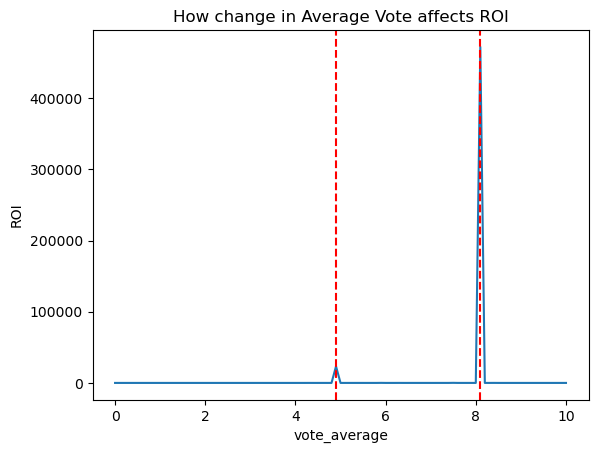

In [111]:
# Line plot of measuring ROI against vote average
vote_rev = sns.lineplot(x = 'vote_average',
                        y = 'roi',
                        data = vote_group2)

# Adding axis label and title
plt.ylabel('ROI')
plt.title('How change in Average Vote affects ROI')

# Adding vertical lines on the outliers at 8.1 and 4.9 vote average
plt.axvline(x=8.1, color = 'red', linestyle = '--')
plt.axvline(x=4.9, color = 'red', linestyle = '--')

plt.show()

#### What does this tell us?

Though this plot may not tell us much about the return on investment, what it does show is that we have 2 very clear outliers when vote_average 4.9 and 8.1.

##### What's causing this?

To start lets look at what is happening in these vote averages.

In [114]:
## Showing the top 5 performing movies with either a 4.9 or 8.1 rating in terms of their ROI
no_zero[(no_zero.vote_average == 4.9) | (no_zero.vote_average == 8.1)].sort_values(by = 'roi', ascending = False).head(5)

,title,id,vote_average,revenue,budget,roi
4238,Modern Times,3082,8.1,8500000,1,8.499999e+06
3137,Nurse 3-D,78383,4.9,10000000,10,9.999990e+05
4723,The Gallows,299245,4.9,42664410,100000,4.256441e+02
2912,Star Wars,11,8.1,775398007,11000000,6.949073e+01
3560,Ouija,242512,4.9,103590271,5000000,1.971805e+01


We can see that there is one clear outlier for both 4.9 and 8.1 vote average.
These are <b>Modern Times</b> and <b>Nurse 3-D</b>.

#### Investigating the outliers

Lets first see how they compare to the average return on investment of their respective 'vote_average' counterparts.

<b>Modern Times</b>

In [119]:
df_lst1 = [['Modern Times',
            ## Returns the ROI for Modern Times
            no_zero[no_zero.id == 3082]['roi'].mean()],    
           
           ['Rest of 8.1 rated movies',
            ## Returns the average ROI for all 8.1 rated movies that aren't Modern Times
            no_zero[(no_zero.id != 3082) & (no_zero.vote_average == 8.1)]['roi'].mean()]]

## Turn the above list in the form [[name, result], [name,result]] into a DataFrame
mt = pd.DataFrame(df_lst1, columns = ['Movie(s)','ROI'])

## Showing the Dataframe
mt

,Movie(s),ROI
0,Modern Times,8.499999e+06
1,Rest of 8.1 rated movies,9.029654e+00


<b>Nurse 3-D</b>

In [122]:
df_lst2 = [['Nurse 3-D',
            ## Returns the revenue/budget for Nurse 3-D
            no_zero[no_zero.id == 78383]['roi'].mean()],
           
           ['Rest of 4.9 rated movies', 
            ## Returns the average revenue/budget for all 4.9 rated movies that aren't Nurse 3-D
            no_zero[(no_zero.id != 78383) & (no_zero.vote_average == 4.9)]['roi'].mean()]]

## Turn the above list in the form [[name, result], [name,result]] into a DataFrame
n3d = pd.DataFrame(df_lst2, columns = ['Movie(s)','ROI'])

## Showing the Dataframe
n3d

,Movie(s),ROI
0,Nurse 3-D,999999.000000
1,Rest of 4.9 rated movies,10.657284


##### How do they compare to the rest of the data?

Though the revenue generated per unit spent for Modern Times and Nurse 3-D look impressive in comparison to equivalently rated movies, how do they stand in comparison to all of the movies in the dataset.

Lets check the top 5 movies

In [126]:
no_zero.sort_values(by = 'roi', ascending = False).head(5) ## Comparing the t~op 5 movies in terms of ROI

,title,id,vote_average,revenue,budget,roi
4238,Modern Times,3082,8.1,8500000,1,8.499999e+06
3137,Nurse 3-D,78383,4.9,10000000,10,9.999990e+05
4577,Paranormal Activity,23827,5.9,193355800,15000,1.288939e+04
4582,Tarnation,1435,7.5,1162014,218,5.329339e+03
4496,The Blair Witch Project,2667,6.3,248000000,60000,4.132333e+03


Here we can see that Mordern Times and Nurse 3-D outperform the 3rd highest measuring movie in terms of return on investment by roughly 660 times and 80 times respectively showing they are clearly outliers and easily to top 2 performing movies in this measure

#### Lets remove our discovered outliers

Now we have discovered outliers that affected the plot above lets try again without the outliers to see if there is a pattern.

In [130]:
no_zero2 = no_zero[(no_zero.id != 78383) & (no_zero.id != 3082)].copy()

In [132]:
vote_group3 = no_zero2.groupby(['vote_average'])[['roi']].mean().copy()

C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\taich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


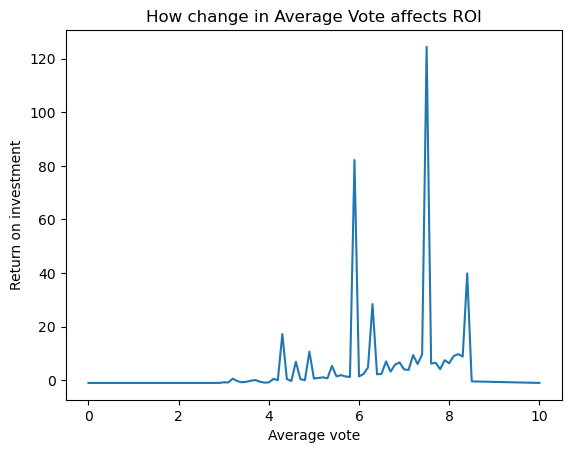

In [134]:
## Creates a line plot measuring ROI as vote_average increases
vote_rev2 = sns.lineplot(x = 'vote_average',
                        y = 'roi',
                        data = vote_group3)

## Give the plot a title and label the axes
plt.xlabel('Average vote')
plt.ylabel('Return on investment')
plt.title('How change in Average Vote affects ROI')

plt.show()

#### What is the takeaway?

Though we have seen that both the revenue and average vote of a movie directly correlates with the average revenue generated, we can clearly see there is no real correlation between the average vote of a movie and the revenue generated per unit budgeted.

Furthermore, the second highest performing movie in this measure has a below average rating which is around 1.3 lower than the dataset average which can be seen below:

In [137]:
no_zero['vote_average'].mean() ## Mean vote_average for movies with a budget > 0.

6.227531225086367

<hr/>

## Conclusion

We can see correlation between higher budget and higher vote average leading to a higher revenue on average. However, there is no correlation between the revenue generated per unit budgeted and the vote average. It is difficult to say why this is without analysing budgetting for the films at each of the vote averages which was not possible due to time constraints.

Since we can see that an increase in average vote is correlated to an increase in revenue, we can infer that movies with better ratings leads to an increase in revenue. This could happen because as more people enjoy the movie and give it a good reputation, it encourages more people to go and watch it.

Also, increasing the budgeting for the movie increases the revenue generated on average. This could be because with a bigger budget, production companies can afford better movie enhancing features such as better CGI. Another factor that an increase in budget will affect is the advertising. More advertising budget will lead to an increase in people knowing about the film and therefore, going to see it.

Since there is no correlation between the return on investment and the vote average, we can infer that directing the budget towards increasing the viewer experience may not necessarily lead to an increase in profitability. 